# Does a pupil's immigration status affect their learning outcome?

In [73]:
import pandas as pd
import statsmodels.stats.api as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

In [121]:
df_pisa = pd.read_csv("PISA-2018-UK.csv")

In [112]:
#Dataset
df_pisa

,math_score,read_score,scie_score,gender,immig,homelang,desk,room,quietplace,homecomputer,...,wealth,ictres,schlregion,schllocation,schltype,stratio,schsize,clsize,schid,stuid
0,408.95099,385.14871,426.54361,Female,Second-Generation,Other language,Yes,No,No,No,...,-1.2991,-1.2471,Great Britain: England,A large city (with over 1 000 000 people),Public,15.8053,893,21-25 students,82600001,82603288
1,467.38870,541.75861,488.95981,Female,Second-Generation,Language of the test,Yes,Yes,Yes,Yes,...,-1.4297,-0.3419,Great Britain: England,A large city (with over 1 000 000 people),Public,15.8053,893,21-25 students,82600001,82604013
2,392.49649,300.32700,323.72211,Female,Second-Generation,Other language,Yes,Yes,Yes,Yes,...,-0.7750,-1.2014,Great Britain: England,A large city (with over 1 000 000 people),Public,15.8053,893,21-25 students,82600001,82604218
3,574.38092,584.90240,529.17432,Female,Native,Language of the test,Yes,Yes,Yes,Yes,...,1.4432,1.2943,Great Britain: England,A large city (with over 1 000 000 people),Public,15.8053,893,21-25 students,82600001,82608603
4,494.03201,573.52588,491.84161,Female,Second-Generation,Language of the test,Yes,No,Yes,Yes,...,-0.8366,0.2272,Great Britain: England,A large city (with over 1 000 000 people),Public,15.8053,893,21-25 students,82600001,82610123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,408.89560,474.86411,474.02670,Female,First-Generation,Language of the test,Yes,Yes,Yes,Yes,...,0.7437,1.2943,Great Britain: Scotland,A small town (3 000 to about 15 000 people),Public,13.7479,818,26-30 students,82650117,82652486
6000,375.97501,424.91730,413.76730,Female,Native,Language of the test,No,Yes,Yes,Yes,...,0.6913,0.7693,Great Britain: Scotland,A small town (3 000 to about 15 000 people),Public,13.7479,818,26-30 students,82650117,82652708
6001,417.80231,452.36230,419.73901,Male,Native,Language of the test,Yes,Yes,Yes,Yes,...,0.7788,0.6901,Great Britain: Scotland,A small town (3 000 to about 15 000 people),Public,13.7479,818,26-30 students,82650117,82653350
6002,396.27051,340.53760,361.05740,Male,Native,Language of the test,Yes,Yes,Yes,Yes,...,0.0622,0.5236,Great Britain: Scotland,A small town (3 000 to about 15 000 people),Public,13.7479,818,26-30 students,82650117,82654133


In [122]:
relevant_df = df_pisa[["math_score", "read_score", "scie_score", "immig", "homelang", "misced", "fisced", "hedres", "wealth", "ictres"]]

relevant_df

,math_score,read_score,scie_score,immig,homelang,misced,fisced,hedres,wealth,ictres
0,408.95099,385.14871,426.54361,Second-Generation,Other language,"ISCED 3A, ISCED 4",ISCED 2,-1.5528,-1.2991,-1.2471
1,467.38870,541.75861,488.95981,Second-Generation,Language of the test,"ISCED 5A, 6",ISCED 2,0.2646,-1.4297,-0.3419
2,392.49649,300.32700,323.72211,Second-Generation,Other language,ISCED 5B,ISCED 5B,-0.6853,-0.7750,-1.2014
3,574.38092,584.90240,529.17432,Native,Language of the test,"ISCED 5A, 6","ISCED 5A, 6",1.1793,1.4432,1.2943
4,494.03201,573.52588,491.84161,Second-Generation,Language of the test,"ISCED 3A, ISCED 4",ISCED 5B,-0.4884,-0.8366,0.2272
...,...,...,...,...,...,...,...,...,...,...
5999,408.89560,474.86411,474.02670,First-Generation,Language of the test,"ISCED 3B, C","ISCED 3B, C",1.1793,0.7437,1.2943
6000,375.97501,424.91730,413.76730,Native,Language of the test,ISCED 2,"ISCED 3B, C",-0.9386,0.6913,0.7693
6001,417.80231,452.36230,419.73901,Native,Language of the test,"ISCED 3B, C","ISCED 3B, C",-0.4396,0.7788,0.6901
6002,396.27051,340.53760,361.05740,Native,Language of the test,"ISCED 5A, 6","ISCED 5A, 6",-0.4903,0.0622,0.5236


In [111]:
#Data types of variables
df_pisa.dtypes

math_score      float64
read_score      float64
scie_score      float64
gender           object
immig            object
homelang         object
desk             object
room             object
quietplace       object
homecomputer     object
homeinternet     object
books            object
booksqty         object
timeread         object
joyread         float64
misced           object
fisced           object
hisced           object
pared             int64
cultposs        float64
hedres          float64
wealth          float64
ictres          float64
schlregion       object
schllocation     object
schltype         object
stratio         float64
schsize           int64
clsize           object
schid             int64
stuid             int64
dtype: object

In [37]:
scores = df_pisa[["math_score", "read_score", "scie_score"]]
scores

,math_score,read_score,scie_score
0,408.95099,385.14871,426.54361
1,467.38870,541.75861,488.95981
2,392.49649,300.32700,323.72211
3,574.38092,584.90240,529.17432
4,494.03201,573.52588,491.84161
...,...,...,...
5999,408.89560,474.86411,474.02670
6000,375.97501,424.91730,413.76730
6001,417.80231,452.36230,419.73901
6002,396.27051,340.53760,361.05740


Descriptive Statistics

In [38]:
df_pisa.describe() 

,math_score,read_score,scie_score,joyread,pared,cultposs,hedres,wealth,ictres,stratio,schsize,schid,stuid
count,6004.000000,6004.000000,6004.000000,6004.000000,6004.000000,6004.000000,6004.000000,6004.000000,6004.000000,6004.000000,6004.000000,6.004000e+03,6.004000e+03
mean,510.493623,516.733685,513.219438,-0.247330,14.149400,-0.128718,0.132813,0.553312,0.545033,15.644460,1034.434710,8.260645e+07,8.261419e+07
std,79.459021,91.159219,87.604874,1.124608,2.133359,1.026989,1.002666,0.891437,1.096633,3.394020,410.857805,1.647561e+04,1.519727e+04
min,221.829610,186.513400,205.444400,-2.731600,3.000000,-1.846100,-4.410600,-6.793100,-3.768000,1.250000,33.000000,8.260000e+07,8.260000e+07
25%,454.794785,454.494815,452.733927,-0.917000,12.000000,-0.784700,-0.581300,-0.034600,-0.153600,13.973375,746.000000,8.260013e+07,8.260495e+07
50%,513.785675,520.231750,515.341460,-0.270400,16.000000,-0.252200,0.047700,0.501400,0.351900,16.433300,1004.000000,8.260026e+07,8.261005e+07
75%,567.903077,583.256790,578.453830,0.391000,16.000000,0.465400,1.179300,1.068400,1.224300,17.610000,1317.000000,8.260038e+07,8.261495e+07
max,754.227170,778.248290,764.432800,2.613100,16.000000,2.053800,1.179300,4.089400,3.601000,25.192500,2421.000000,8.265012e+07,8.265454e+07


In [40]:
df_pisa.groupby("immig")[["math_score", "read_score", "scie_score"]].describe()

math_score                                                \
                       count        mean        std        min         25%   
immig                                                                        
First-Generation       385.0  497.491059  89.075576  249.93840  438.479800   
Native                5237.0  511.474938  78.879015  221.82961  455.882200   
Second-Generation      382.0  510.145037  76.100536  305.27451  460.149018   

                                                     read_score              \
                          50%         75%        max      count        mean   
immig                                                                         
First-Generation   499.027800  565.049010  719.69690      385.0  492.286376   
Native             514.962830  568.604980  754.22717     5237.0  518.609785   
Second-Generation  509.715835  564.051913  702.67139      382.0  515.652742   

                   ...                        scie_score              \
                   ...         75%        max      count        mean   
immig              ...                                                 
First-Generation   ...  563.801700  735.19922      385.0  498.228708   
Native             ...  584.705630  778.24829     5237.0  514.762580   
Second-Generation  ...  575.803988  726.14252      382.0  507.172301   

                                                                            \
                         std        min         25%        50%         75%   
immig                                                                        
First-Generation   93.847019  206.45210  436.169310  504.38629  567.928890   
Native             87.151926  205.44440  453.603210  516.79742  579.297120   
Second-Generation  85.817689  252.22411  452.609623  502.40210  572.432987   

                              
                         max  
immig                         
First-Generation   711.34192  
Native             764.43280  
Second-Generation  740.64758  

[3 rows x 24 columns]

In [41]:
df_pisa.aggregate(["mean", "median", "min", "max"])



,math_score,read_score,scie_score,gender,immig,homelang,desk,room,quietplace,homecomputer,...,wealth,ictres,schlregion,schllocation,schltype,stratio,schsize,clsize,schid,stuid
mean,510.493623,516.733685,513.219438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.553312,0.545033,NaN,NaN,NaN,15.64446,1034.43471,NaN,8.260645e+07,8.261419e+07
median,513.785675,520.231750,515.341460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.501400,0.351900,NaN,NaN,NaN,16.43330,1004.00000,NaN,8.260026e+07,8.261005e+07
min,221.829610,186.513400,205.444400,Female,First-Generation,Language of the test,No,No,No,No,...,-6.793100,-3.768000,Great Britain: England,A city (100 000 to about 1 000 000 people),Private Government-dependent,1.25000,33.00000,15 students or fewer,8.260000e+07,8.260000e+07
max,754.227170,778.248290,764.432800,Male,Second-Generation,Other language,Yes,Yes,Yes,Yes,...,4.089400,3.601000,Great Britain: Wales,"A village, hamlet or rural area (fewer than 3 ...",Public,25.19250,2421.00000,More than 50 students,8.265012e+07,8.265454e+07


Descriptive Statistics

In [113]:
#Table which shows the descriptive statistics of academic performance by immgrant status
stats = ["count","mean", "std", "min", "max"]

df_pisa.groupby("immig")[["math_score"]].aggregate(stats)

math_score                                             
                       count        mean        std        min        max
immig                                                                    
First-Generation         385  497.491059  89.075576  249.93840  719.69690
Native                  5237  511.474938  78.879015  221.82961  754.22717
Second-Generation        382  510.145037  76.100536  305.27451  702.67139

In [116]:
#Table which shows the descriptive statistics of academic performance by immgrant status
df_pisa.groupby("immig")[["read_score"]].aggregate(stats)

read_score                                             
                       count        mean        std        min        max
immig                                                                    
First-Generation         385  492.286376  97.748250  202.80679  735.19922
Native                  5237  518.609785  90.512790  186.51340  778.24829
Second-Generation        382  515.652742  89.774905  271.51730  726.14252

In [115]:
#Table which shows the descriptive statistics of academic performance by immgrant status
df_pisa.groupby("immig")[["scie_score"]].aggregate(stats)

scie_score                                             
                       count        mean        std        min        max
immig                                                                    
First-Generation         385  498.228708  93.847019  206.45210  711.34192
Native                  5237  514.762580  87.151926  205.44440  764.43280
Second-Generation        382  507.172301  85.817689  252.22411  740.64758

In [42]:
df_pisa.groupby(["immig", "homelang"]).size()

immig              homelang            
First-Generation   Language of the test     126
                   Other language           259
Native             Language of the test    5129
                   Other language           108
Second-Generation  Language of the test     255
                   Other language           127
dtype: int64

In [108]:
#Size of subgroups - immigration status against home language
pd.crosstab(df_pisa["immig"], df_pisa["homelang"], margins=True, margins_name="Total")

homelang,Language of the test,Other language,Total
immig,,,
First-Generation,126,259,385
Native,5129,108,5237
Second-Generation,255,127,382
Total,5510,494,6004


In [109]:
#Size of subgroups in percentage 
pd.crosstab(df_pisa["immig"], df_pisa["homelang"], normalize=True, margins=True, margins_name="Total")*100

homelang,Language of the test,Other language,Total
immig,,,
First-Generation,2.098601,4.313791,6.412392
Native,85.426382,1.798801,87.225183
Second-Generation,4.247169,2.115256,6.362425
Total,91.772152,8.227848,100.000000


In [167]:
df_pisa.corr()

,math_score,read_score,scie_score,joyread,pared,cultposs,hedres,wealth,ictres,stratio,schsize,schid,stuid
math_score,1.000000,0.853672,0.892005,0.248335,0.189982,0.221738,0.237297,0.155456,0.175710,-0.052882,0.073888,-0.116768,-0.109507
read_score,0.853672,1.000000,0.899371,0.367978,0.154347,0.226160,0.176986,0.071949,0.113891,-0.050978,0.045018,-0.068387,-0.060721
scie_score,0.892005,0.899371,1.000000,0.323275,0.183772,0.230732,0.192080,0.109629,0.145441,-0.048430,0.053875,-0.099511,-0.089173
joyread,0.248335,0.367978,0.323275,1.000000,0.098987,0.305356,0.127974,-0.037394,0.034181,-0.053469,0.031899,-0.028916,-0.025722
pared,0.189982,0.154347,0.183772,0.098987,1.000000,0.288694,0.240612,0.244866,0.212641,-0.065570,0.046904,-0.001336,0.003502
cultposs,0.221738,0.226160,0.230732,0.305356,0.288694,1.000000,0.422756,0.278212,0.285713,-0.077087,0.037199,-0.082113,-0.080205
hedres,0.237297,0.176986,0.192080,0.127974,0.240612,0.422756,1.000000,0.344275,0.389977,-0.020222,0.065539,-0.049336,-0.046361
wealth,0.155456,0.071949,0.109629,-0.037394,0.244866,0.278212,0.344275,1.000000,0.742471,-0.067039,-0.046284,-0.053306,-0.048880
ictres,0.175710,0.113891,0.145441,0.034181,0.212641,0.285713,0.389977,0.742471,1.000000,-0.057094,0.006982,-0.022837,-0.022318
stratio,-0.052882,-0.050978,-0.048430,-0.053469,-0.065570,-0.077087,-0.020222,-0.067039,-0.057094,1.000000,0.317542,-0.272709,-0.260274


In [128]:
#Correlation between numerical variables
relevant_df.corr()

,math_score,read_score,scie_score,hedres,wealth,ictres
math_score,1.000000,0.853672,0.892005,0.237297,0.155456,0.175710
read_score,0.853672,1.000000,0.899371,0.176986,0.071949,0.113891
scie_score,0.892005,0.899371,1.000000,0.192080,0.109629,0.145441
hedres,0.237297,0.176986,0.192080,1.000000,0.344275,0.389977
wealth,0.155456,0.071949,0.109629,0.344275,1.000000,0.742471
ictres,0.175710,0.113891,0.145441,0.389977,0.742471,1.000000


In [45]:
df_pisa["pared"].corr(df_pisa["math_score"])

0.18998172671010308

In [47]:
df_pisa[["homelang"]].value_counts()

homelang            
Language of the test    5510
Other language           494
dtype: int64

In [48]:
homelang_by_immig = df_pisa.groupby("immig")["homelang"]
homelang_by_immig

In [140]:
df_pisa["cultposs"].corr(df_pisa["read_score"])

0.22616039097803203

In [49]:
#frequency table for different immig groups
df_pisa["immig"].value_counts()

Native               5237
First-Generation      385
Second-Generation     382
Name: immig, dtype: int64

In [97]:
#grouping immig status by wealth
wealth_by_immig = df_pisa.groupby("immig")["wealth"]
wealth_by_immig

In [148]:
#means of each subgroup// results show large diff btwn native and first
immig_means = wealth_by_immig.mean()
immig_means

immig
First-Generation     0.058291
Native               0.608366
Second-Generation    0.297461
Name: wealth, dtype: float64

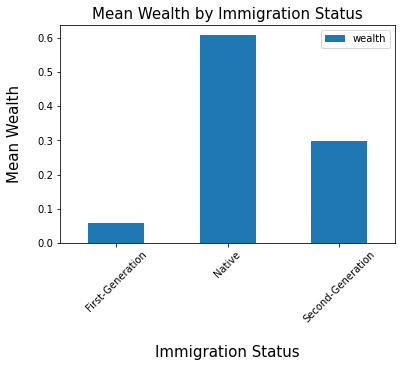

In [166]:
immig_means.plot.bar()

plt.xlabel("Immigration Status", labelpad=20, fontsize=15)
plt.ylabel("Mean Wealth", labelpad=15, fontsize=15)
plt.title("Mean Wealth by Immigration Status", fontsize=15)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [101]:
# Compute correlation coefficient
df_pisa["wealth"].corr(df_pisa["math_score"])

0.15545555080599466

In [98]:
wealth_by_immig

In [54]:
score_by_immig = df_pisa.groupby("immig")[["math_score", "read_score", "scie_score"]]
score_by_immig 

In [55]:
immig_means2 = score_by_immig.mean()
immig_means2

,math_score,read_score,scie_score
immig,,,
First-Generation,497.491059,492.286376,498.228708
Native,511.474938,518.609785,514.762580
Second-Generation,510.145037,515.652742,507.172301


In [56]:
immig_means2["math_score"]

immig
First-Generation     497.491059
Native               511.474938
Second-Generation    510.145037
Name: math_score, dtype: float64

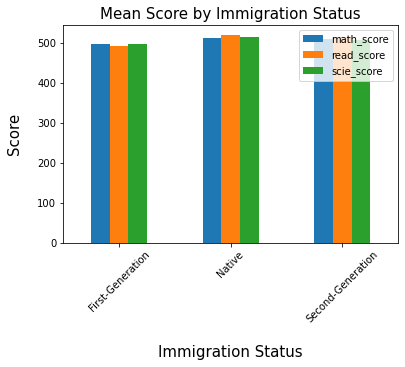

In [176]:
immig_means2.plot.bar()

plt.xlabel("Immigration Status", labelpad=20, fontsize=15)
plt.ylabel("Score", labelpad=15, fontsize=15)
plt.title("Mean Score by Immigration Status", fontsize=15)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [58]:
# is the difference in mean statiscally significant?

score_first = score_by_immig.get_group("First-Generation")
score_native = score_by_immig.get_group("Native")
score_second = score_by_immig.get_group("Second-Generation")

print(score_first.mean())
print(score_native.mean())
print(score_second.mean())


math_score    497.491059
read_score    492.286376
scie_score    498.228708
dtype: float64
math_score    511.474938
read_score    518.609785
scie_score    514.762580
dtype: float64
math_score    510.145037
read_score    515.652742
scie_score    507.172301
dtype: float64


In [59]:
df_pisa.groupby("immig")[["pared"]].mean()


,pared
immig,
First-Generation,14.090909
Native,14.150850
Second-Generation,14.188482


Hypothesis test for equality of means among subgroups:

$H_0: \mu_1 = \mu_2$

$H_A: \mu_1 \neq \mu_2$


In [76]:
# Mathematics- Test for means equality  (t test and p value to check statistal significance) 

tstat, pvalue, df = stats.ttest_ind(score_first["math_score"], score_native["math_score"], alternative='two-sided', usevar='unequal')

print(f"The value of the t-stat statistic is {tstat} in mathematics")
print(f"The p-value is {pvalue} in mathematics")


The value of the t-stat statistic is -2.995220543091865 in mathematics
The p-value is 0.002901161125479746 in mathematics


In [74]:
#Reading- test for means equality

tstat, pvalue, df = stats.ttest_ind(score_first["read_score"], score_native["read_score"], alternative='two-sided', usevar='unequal')

print(f"The value of the t-stat statistic is {tstat} in reading")
print(f"The p-value is {pvalue} in reading")


The value of the t-stat statistic is -5.124951789999333 in reading
The p-value is 4.4896877256591756e-07 in reading


In [75]:
#Science- test for means equality

tstat, pvalue, df = stats.ttest_ind(score_first["scie_score"], score_native["scie_score"], alternative='two-sided', usevar='unequal')

print(f"The value of the t-stat statistic is {tstat} in science")
print(f"The p-value is {pvalue} in science")



The value of the t-stat statistic is -3.3522475169620134 in science
The p-value is 0.0008717770043709955 in science


In [174]:
#model formula
basic_model = 'np.log(read_score) ~ C(immig)'  

#model
ols_basic_model = smf.ols(basic_model, data=df_pisa)

ols_basic_model.exog_names

['Intercept', 'C(immig)[T.Native]', 'C(immig)[T.Second-Generation]']

In [175]:
#Estimation of coefficents
estim_basic_model_results = ols_basic_model.fit()
estim_basic_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(read_score)   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     17.14
Date:                Thu, 05 May 2022   Prob (F-statistic):           3.79e-08
Time:                        02:48:29   Log-Likelihood:                 1561.1
No. Observations:                6004   AIC:                            -3116.
Df Residuals:                    6001   BIC:                            -3096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         6.1772      0.010    649.492      0.000       6.159       6.196
C(immig)[T.Native]                0.0577      0.010      5.852      0.000       0.038       0.077
C(immig)[T.Second-Generation]     0.0520      0.013      3.859      0.000       0.026       0.078
==============================================================================
Omnibus:                      492.047   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              635.500
Skew:                          -0.724   Prob(JB):                    1.01e-138
Kurtosis:                       3.667   Cond. No.                         9.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
#model formula when other variables are accounted for
full_model = 'np.log(read_score) ~ C(immig) + C(homelang) + wealth' 

#model
ols_full_model = smf.ols(full_model, data=df_pisa)

ols_full_model.exog_names

    

['Intercept',
 'C(immig)[T.Native]',
 'C(immig)[T.Second-Generation]',
 'C(homelang)[T.Other language]',
 'wealth']

In [169]:
#Estimation of coefficents
estim_full_model_results = ols_full_model.fit()
estim_full_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(read_score)   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     20.09
Date:                Thu, 05 May 2022   Prob (F-statistic):           1.89e-16
Time:                        02:35:20   Log-Likelihood:                 1584.0
No. Observations:                6004   AIC:                            -3158.
Df Residuals:                    5999   BIC:                            -3124.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         6.2129      0.012    512.445      0.000       6.189       6.237
C(immig)[T.Native]                0.0157      0.012      1.276      0.202      -0.008       0.040
C(immig)[T.Second-Generation]     0.0307      0.014      2.197      0.028       0.003       0.058
C(homelang)[T.Other language]    -0.0541      0.011     -4.818      0.000      -0.076      -0.032
wealth                            0.0122      0.003      4.467      0.000       0.007       0.018
==============================================================================
Omnibus:                      493.611   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              638.370
Skew:                          -0.725   Prob(JB):                    2.40e-139
Kurtosis:                       3.672   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
# Get immigration status labels as a list of strings
immigration_status = df_pisa["immig"].unique().tolist()


# For each immigration status, get math score Series and store them in a list 
immig_math_score = [df_pisa.loc[df_pisa["immig"] == immig, "math_score"] for immig in immigration_status]
# For each immigration status, get math score Series and store them in a list 
immig_read_score = [df_pisa.loc[df_pisa["immig"] == immig, "read_score"] for immig in immigration_status]

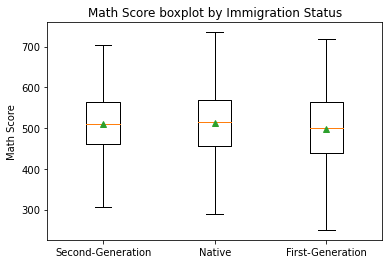

In [141]:
# Create multiple boxplots in the same graph
plt.boxplot(immig_math_score,          
            labels=immigration_status,  
            showfliers=False,
            showmeans=True       
            )

# Add info
plt.ylabel("Math Score")
plt.title("Math Score boxplot by Immigration Status")

plt.show()

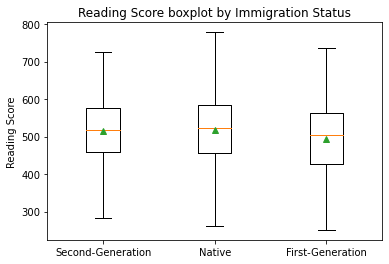

In [142]:
# Create multiple boxplots in the same graph
plt.boxplot(immig_read_score,          
            labels=immigration_status,  
            showfliers=False,
            showmeans=True       
            )

# Add info
plt.ylabel("Reading Score")
plt.title("Reading Score boxplot by Immigration Status")

plt.show()